# 迁移学习
作者：郑灵翔,lxzheng@xmu.edu.cn

使用Tensorflow HUB进行迁移学习，解决花卉分类问题

## 安装tensorflow-hub

In [ ]:
!pip install tensorflow-hub

## 导入相关库

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Tensorflow HUB预训练模型
tf-hub预训练模型

In [4]:
IMG_SHAPE=(224, 224, 3)

In [5]:
feature_extractor_url='https://hub.tensorflow.google.cn/tensorflow/efficientnet/b0/feature-vector/1'
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMG_SHAPE)

In [6]:
model = keras.Sequential()
model.add(feature_extractor_layer)
model.add(keras.layers.Dense(5,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              4049564   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 4,055,969
Trainable params: 6,405
Non-trainable params: 4,049,564
_________________________________________________________________


## 数据预处理

In [8]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
dataset_file = tf.keras.utils.get_file(origin=dataset_url,extract=True)

In [9]:
import os
fname=os.path.basename(dataset_file)
dataset_path=os.path.dirname(dataset_file)+'/'+fname.split('.')[0]

In [10]:
%ls $dataset_path

LICENSE.txt  daisy/  dandelion/  roses/  sunflowers/  tulips/


In [11]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               validation_split=0.10)

training_generator = image_generator.flow_from_directory(dataset_path, 
                                                         target_size=(224,224),
                                                         subset='training',
                                                         batch_size=4)
val_generator = image_generator.flow_from_directory(dataset_path, 
                                                    target_size=(224,224),
                                                    subset='validation',
                                                    batch_size=4)

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [12]:
class_names=list(training_generator.class_indices.keys())
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## 模型训练

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [27]:
his=model.fit(training_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
827/827 [==============================] - 11s 14ms/step - loss: 0.5614 - accuracy: 0.8539 - val_loss: 0.6164 - val_accuracy: 0.8077
Epoch 2/20
827/827 [==============================] - 11s 14ms/step - loss: 0.5317 - accuracy: 0.8575 - val_loss: 0.5911 - val_accuracy: 0.8132
Epoch 3/20
827/827 [==============================] - 11s 14ms/step - loss: 0.5059 - accuracy: 0.8615 - val_loss: 0.5687 - val_accuracy: 0.8159
Epoch 4/20
827/827 [==============================] - 11s 14ms/step - loss: 0.4832 - accuracy: 0.8669 - val_loss: 0.5491 - val_accuracy: 0.8214
Epoch 5/20
827/827 [==============================] - 11s 14ms/step - loss: 0.4630 - accuracy: 0.8702 - val_loss: 0.5314 - val_accuracy: 0.8214
Epoch 6/20
827/827 [==============================] - 11s 14ms/step - loss: 0.4450 - accuracy: 0.8766 - val_loss: 0.5159 - val_accuracy: 0.8214
Epoch 7/20
827/827 [==============================] - 11s 14ms/step - loss: 0.4287 - accuracy: 0.8790 - val_loss: 0.5016 - val_accuracy:

In [16]:
import numpy as np
import matplotlib.pyplot as plt

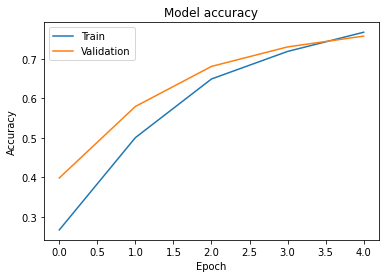

In [17]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

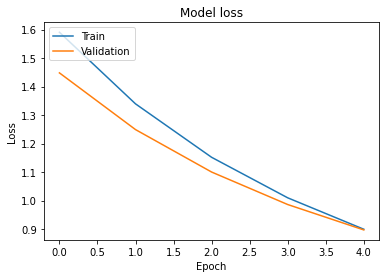

In [18]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 测试模型

In [21]:
from PIL import Image
data_dir='/tf/test_images/'
imgs=[]
labels=[]
for f in os.listdir(data_dir):
    input_image = Image.open(data_dir+f)
    input_image = input_image.resize((224, 224))
    input_image = np.array(input_image)/255.0
    input_image = np.expand_dims(input_image, axis=0)
    imgs.append(input_image)
    labels.append(f.split('.')[0][:-1])
imgs=np.concatenate([x for x in imgs])

In [25]:
predict_results=model.predict(imgs)

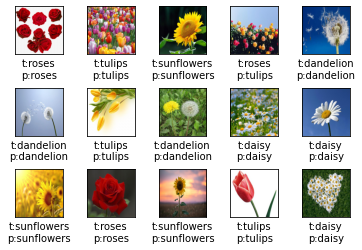

In [26]:
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[i])
    plt.xlabel('t:'+labels[i]+'\n'+'p:'+class_names[np.argmax(predict_results[i])])
plt.show()

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="知识共享许可协议" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />本作品采用<a rel="license" href="http://creativecommons.org/licenses/by/4.0/">知识共享署名 4.0 国际许可协议</a>进行许可。